# <span style="color:#2c061f"> Macro 318: Tutorial #4 </span>  

<br>

## <span style="color:#374045"> Solow-Swan model </span>


#### <span style="color:#374045"> Lecturer: </span> <span style="color:#d89216"> <br> Dawie van Lill (dvanlill@sun.ac.za) </span>

These are basic notes for the Solow model in Julia. We will closely follow notes from Nicolas Cachanosky. In lecture we will be going over the basics of difference equations and how they relate the Solow model. 

You will notice that the Solow model is different from our models that we previously covered in that it contains a time component. This is why we need to consider **dynamics**. Evolution of variables over time. 

Below are the packages that we will be using for this tutorial. 

In [59]:
import Pkg

In [69]:
Pkg.add("Plots")
Pkg.add("Symbolics")
Pkg.add("Zygote")

   Resolving package versions...
  No Changes to `~/.julia/environments/v1.7/Project.toml`
  No Changes to `~/.julia/environments/v1.7/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.7/Project.toml`
  No Changes to `~/.julia/environments/v1.7/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.7/Project.toml`
  No Changes to `~/.julia/environments/v1.7/Manifest.toml`


In [70]:
using Plots
using Symbolics
using Zygote

# Learning outcomes

# Table of contents

1. Consumers in the Solow model
2. Production function
3. Investment decisions
4. Competitive equilibrium
5. Difference equations
6. Shocks

## 1. Consumers 

In class we discussed the Solow model in detail. We started with some of the following assumption, 

$$
N_{t+1} = (1 + n) N_{t}
$$

This means that the population grows at a constant rate $n$. 

**Notation**: The notation has changed a bit here. We are now working with time subscripts. This is more traditional in the literature and also will help with our explanations down the line. 

An important consideration for this model is the behaviour of consumers with respect to saving and investment. 

### 1.1 Saving and investment

The savings rate $s \in (0, 1)$ is **exogenous**!

Saving is a portion of income $\rightarrow S_t = s Y_{t}$

Agents consume the rest of their income $ \rightarrow C_{t} = (1 - s)Y_{t}$

Saving is a key component since it will finance **investment activities** in the model.

Investment equals saving in this economy $\rightarrow I_t = sY_t = S_t$

In a closed economy with no government $\rightarrow C_t = Y_t - I_t$

Next we look at the **firm side** of the problem. We start with the production function. 

## 2. Production function

One of the most important considerations in the Solow model is the production function. The production function is given by 

$$
Y_{t}\left(K_{t}, N_{t}\right) = z_{t} \cdot F\left(K_{t}, N_{t}\right)
$$

### 2.1. Cobb-Douglas production function 

For this example we can assume a Cobb-Douglas production function in discrete time $(t)$ with Hicks-neutral techonology $(z)$, and with constant returns to scale where $\alpha \in (0, 1)$ is the output elasticity of capital.

$$
\begin{equation*}
    Y_{t}\left(K_{t}, N_{t}\right) = z_{t} \cdot F\left(K_{t}, N_{t}\right) =  z_{t} \cdot \left(K_{t} ^{\alpha} N_{t}^{1-\alpha}\right)
\end{equation*}
$$

From our notes we have that there are decreasing and positive returns to scale in each factor individually. We can observe this from the partial derivatives. The first and second derivatives with respect to capital and labor are:
$$
\begin{align*}
    \frac{\partial   Y_{t}}{\partial K}   = \alpha \cdot z_t\left(\frac{N_{t}}{K_{t}}\right)^{1-\alpha} 
  = \alpha \cdot \frac{Y_{t}}{K_{t}} > 0 \; \text{and} \;
    \frac{\partial^2 Y_{t}}{\partial K^2} = -\alpha (1-\alpha) \cdot z_t\left(\frac{N_{t}}{K_{t}}\right)^{1-\alpha} < 0 \\
    \frac{\partial   Y_{t}}{\partial N}   = (1-\alpha) \cdot z_t\left(\frac{K_{t}}{N_{t}}\right)^{\alpha} 
  = (1-\alpha) \cdot \frac{Y_{t}}{N_{t}} > 0 \; \text{and} \;
    \frac{\partial^2 Y_{t}}{\partial N^2} = -\alpha (1-\alpha) \cdot z_t\left(\frac{K_{t}}{N_{t}}\right)^{1-\alpha} < 0
\end{align*}
$$

We know from our experience with Julia so far that we can calculate these partial derivatives using the `Symbolics` package. 

In [62]:
@variables K N z α

Y = z * (K ^ α) * (N ^ (1 - α)) 

∂Y_∂K = Differential(K)
∂Y_∂N = Differential(N)
∂2Y_∂K2 = Differential(K) ∘ Differential(K)
∂2Y_∂N2 = Differential(N) ∘ Differential(N);

In [63]:
expand_derivatives(∂Y_∂K(Y))

z*α*(K^(α - 1))*(N^(1 - α))

In [64]:
expand_derivatives(∂Y_∂N(Y))

z*(K^α)*(N^(-α))*(1 - α)

In [65]:
expand_derivatives(∂2Y_∂K2(Y))

z*α*(K^(α - 2))*(N^(1 - α))*(α - 1)

In [66]:
expand_derivatives(∂2Y_∂N2(Y))

-z*α*(K^α)*(N^(-1 - α))*(1 - α)

## 2.1 Production per capita

Next, we write our production function in its intensive form. This means that we write the production function in per capita terms, 

$$
\begin{align*}
    Y_{t} &= z_{t} \cdot \left(K_{t}^{\alpha}N_{t}^{1-\alpha} \right) \\
    y_{t} &= \frac{Y_{t}}{N_{t}} = z_{t} \cdot \left[ \left(\frac{K_{t}}{N_{t}} \right)^{\alpha} \left(\frac{N_{t}}{N_{t}} \right)^{1-\alpha} \right] \\
    y_{t} &= z_{t} \cdot f\left(k_{t}\right) = z_{t} \cdot k_{t}^{\alpha}
\end{align*}
$$

Next we are going to plot the intensive form of the production function, as in the textbook.

## 2.2 Production function plot

We start by plotting the two dimensional version of the production function.

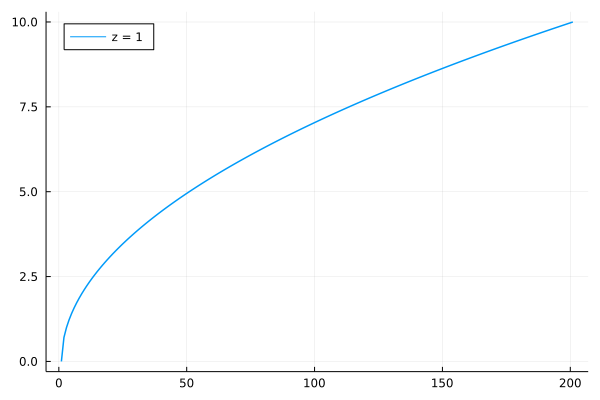

In [78]:
K = 100
α = 0.5
k = 0:0.5:K
z = 1

function production_per_capita(k, z)
    return y = z .* k .^ α
end

plot(production_per_capita(k, z), label = "z = 1", legend = :topleft, lw = 1.5)

Now we will generate the same plot, but this time we will include a tangent line that provides the value for the marginal product of capital at a point. This is similar to the graph in Chapter 7 in the textbook. 

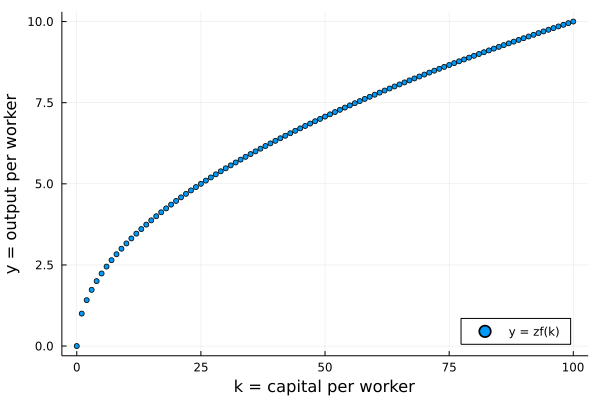

In [96]:
g(k; z = 1) = z .* k .^ α
g'(2)

scatter(g, 0:1:100, legend = :bottomright, markersize = 3, label = "y = zf(k)", xlabel = "k = capital per worker", ylabel = "y = output per worker")

One of the things we can easily see is the effect that an increase in productivity will have on the production function. We use a `for loop` to iterate over the different values of $z$.

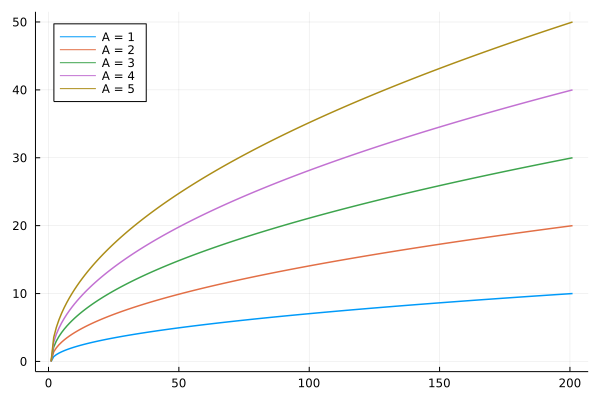

In [58]:
p1 = plot()

for i in z
    plot!(p1, production_per_capita(k, i), label = "z = $i", legend = :topleft, lw = 1.5)
end

plot(p1)

We see that with an increase in $z$ the boundary of the production function shifts upward. This indicates that we are able to produce a higher level of output at each given level of capital. In other words, the productivity increase augments our ability to generate output from an existing capital stock. 

## 3. Investment decisions

## 4. Competitive equilibrium

## 5. Difference equations

In the next section we are going to provide a brief introduction to difference equations and then link this back to the idea of the Solow model. These notes are an almost direct port of the Python ones at [QuantEcon](https://python.quantecon.org/scalar_dynam.html). Please look at that website for a more complete exploration of difference equations. 

This section is perhaps a bit more technical, so be sure to **slowly** go through the material. 